# Prediction of Employee Attrition

**Problem Description**

As the COVID-19 keeps unleashing its havoc, the world continues to get pushed into the crisis of the great economic recession, more and more companies start to cut down their underperforming employees. Companies firing hundreds and thousands of Employees is a typical headline today. Cutting down employees or reducing an employee salary is a tough decision to take. It needs to be taken with utmost care as imprecision in the identification of employees whose performance is attriting may lead to sabotaging of both employees' career and the company's reputation in the market.

To predict Employee Attrition by the given data about his/her past history.

Data set was provided by IBM.

![Image](https://i2.wp.com/thecontextofthings.com/wp-content/uploads/2017/01/employee-attrition.jpg?t=1305899489&quality=60&w=600)

**Problem Overview**

Given that we have data on former employees, this is a standard supervised classification problem where the label is a binary variable, 0 (active employee), 1 (former employee). In this study, our target variable Y is the probability of an employee leaving the company.

**Dataset Analysis**

In [68]:
# importing libraries for data handling and analysis 
import pandas as pd
import numpy as np

df = pd.read_csv('train.csv',index_col='Id')
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
Id,,,,,,,,,,,,,,,,,,,,,
1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,Female,...,3,0,12,2,11,7,6,7,4,1
2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,Female,...,3,2,7,2,3,2,1,1,2,1
3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,Male,...,3,0,12,3,9,7,7,3,5,1
4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,Male,...,3,0,18,2,7,7,1,7,4,1
5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,Male,...,3,1,10,2,10,7,7,8,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1624,42,1,Travel_Frequently,Research & Development,19,3,Medical,752,3,Male,...,3,0,7,2,2,2,2,2,3,1
1625,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,Male,...,3,0,12,3,9,7,7,3,5,1
1626,25,1,Travel_Rarely,Sales,9,2,Life Sciences,1439,1,Male,...,3,0,6,2,3,2,2,2,5,1


In [2]:
# importing libraries for data visualisations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# To get rid of duplicates present in the data
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

628


In [4]:
x = df.drop(['Attrition'],axis=1)
y = df.Attrition
x.shape

(1000, 27)

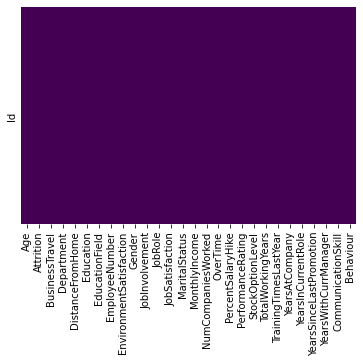

In [5]:
# to check whether mssing values present or not

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

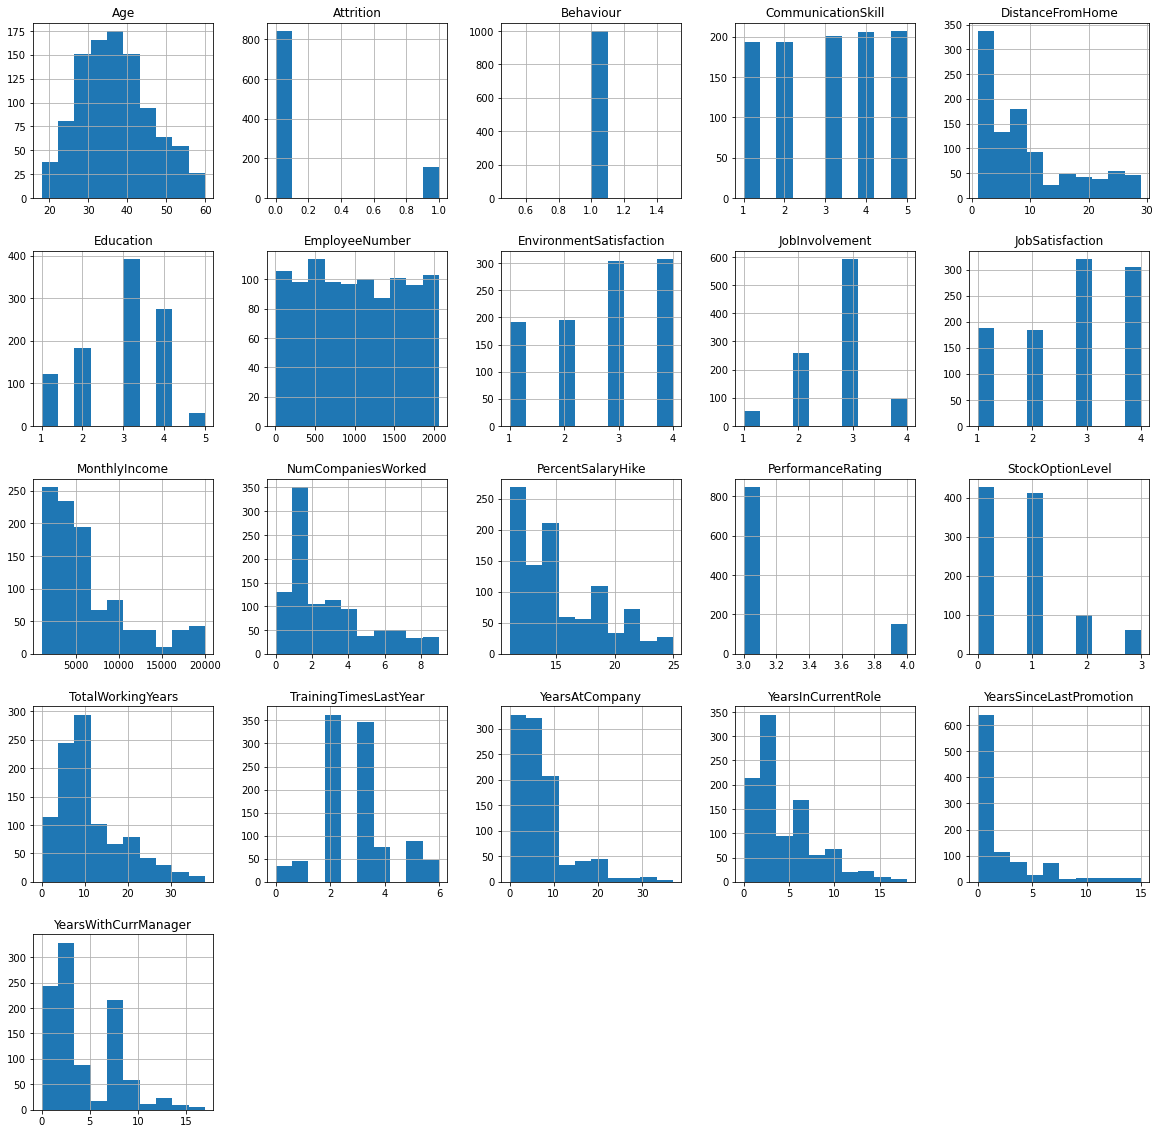

In [6]:
df.hist(figsize=(20,20))
plt.show()

In [7]:
types = df.columns.to_series().groupby(df.dtypes).groups
types

{dtype('int64'): Index(['Age', 'Attrition', 'DistanceFromHome', 'Education', 'EmployeeNumber',
        'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction',
        'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
        'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears',
        'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
        'YearsSinceLastPromotion', 'YearsWithCurrManager', 'CommunicationSkill',
        'Behaviour'],
       dtype='object'),
 dtype('O'): Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
        'MaritalStatus', 'OverTime'],
       dtype='object')}

In [7]:
cols = df.columns
cols_ob = []
for j in cols :
    if df[j].dtypes=='object':
        cols_ob.append(j)
df.shape

(1000, 28)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d215da8a60>,
 'caps': [<matplotlib.lines.Line2D at 0x1d2162e0160>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d215da89d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d2162e0820>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d2162e0b20>],
 'means': []}

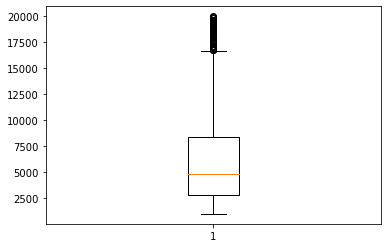

In [8]:
plt.boxplot(x.MonthlyIncome)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d216326e50>,
 'caps': [<matplotlib.lines.Line2D at 0x1d216334550>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d216326af0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d216334c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d216334f10>],
 'means': []}

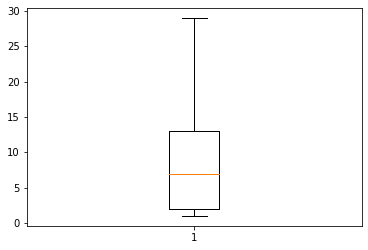

In [9]:
plt.boxplot(x.DistanceFromHome)

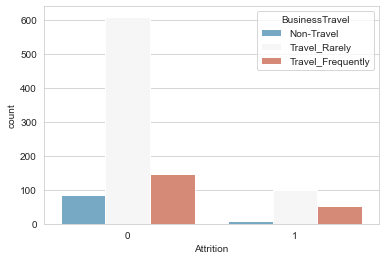

In [10]:
import seaborn as sns
sns.set_style('whitegrid')
sns.countplot(x='Attrition',hue='BusinessTravel',data=df,palette='RdBu_r')

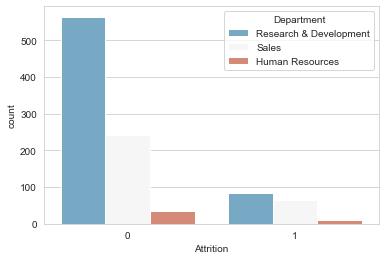

In [11]:
sns.countplot(x='Attrition',hue='Department',data=df,palette='RdBu_r')

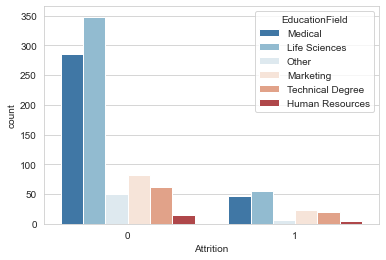

In [12]:
sns.countplot(x='Attrition',hue='EducationField',data=df,palette='RdBu_r')

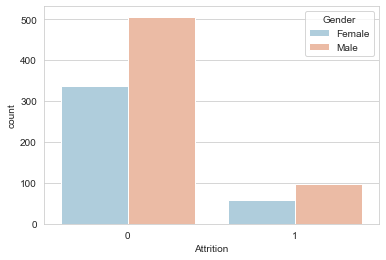

In [13]:
sns.countplot(x='Attrition',hue='Gender',data=df,palette='RdBu_r')

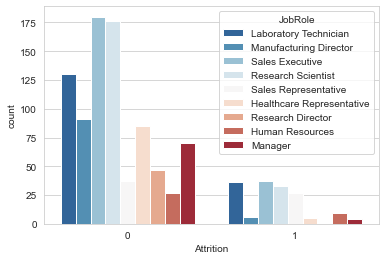

In [14]:
sns.countplot(x='Attrition',hue='JobRole',data=df,palette='RdBu_r')

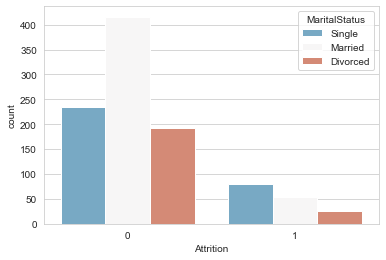

In [15]:
sns.countplot(x='Attrition',hue='MaritalStatus',data=df,palette='RdBu_r')

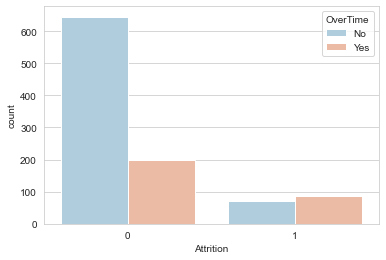

In [16]:
sns.countplot(x='Attrition',hue='OverTime',data=df,palette='RdBu_r')

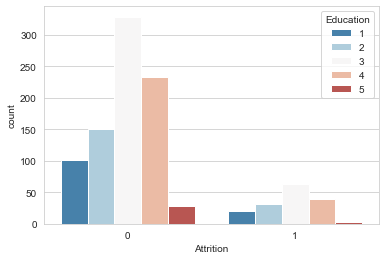

In [17]:
sns.countplot(x='Attrition',hue='Education',data=df,palette='RdBu_r')

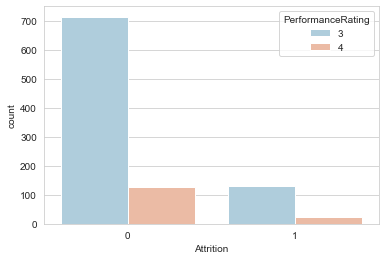

In [18]:
sns.countplot(x='Attrition',hue='PerformanceRating',data=df,palette='RdBu_r')

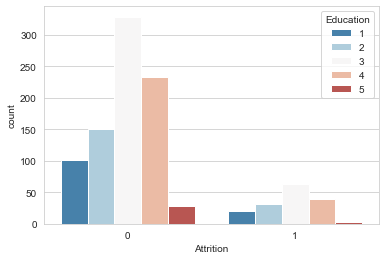

In [19]:
sns.countplot(x='Attrition',hue='Education',data=df,palette='RdBu_r')

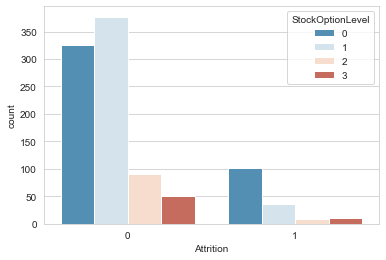

In [20]:
sns.countplot(x='Attrition',hue='StockOptionLevel',data=df,palette='RdBu_r')

**Conculsions by EDA**
1. Dataset contains both numerical and categorical features and target variable is categorical
2. Duplicates are present in the data 
3. The dataset does not contains any missing values, and all features are of the correct data type.
4. We can remove Behaviour feature as it has unique value
5. we can also remove Employee number as it is only an ID for an employee and has no effect on his/her Attrition



**Data preprocessing**

In [21]:
x = df.drop(['Attrition'],axis=1)
y = df.Attrition
#y = y[x.MonthlyIncome<15000]  # if want to remove outliers from data
#x = x[x.MonthlyIncome<15000]

In [22]:
# checking skewness of numerical features 
df.skew()

Age                        0.376387
Attrition                  1.888481
DistanceFromHome           1.008337
Education                 -0.321484
EmployeeNumber             0.046570
EnvironmentSatisfaction   -0.325588
JobInvolvement            -0.494499
JobSatisfaction           -0.364461
MonthlyIncome              1.374174
NumCompaniesWorked         1.030069
PercentSalaryHike          0.835923
PerformanceRating          1.930742
StockOptionLevel           0.999030
TotalWorkingYears          1.096542
TrainingTimesLastYear      0.567682
YearsAtCompany             1.783427
YearsInCurrentRole         0.965682
YearsSinceLastPromotion    2.048824
YearsWithCurrManager       0.905783
CommunicationSkill        -0.042838
Behaviour                  0.000000
dtype: float64

In [23]:
skew_feas = ['MonthlyIncome','DistanceFromHome','TotalWorkingYears','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager','YearsInCurrentRole',
             'PerformanceRating']
x[skew_feas].skew()

MonthlyIncome              1.374174
DistanceFromHome           1.008337
TotalWorkingYears          1.096542
YearsAtCompany             1.783427
YearsSinceLastPromotion    2.048824
YearsWithCurrManager       0.905783
YearsInCurrentRole         0.965682
PerformanceRating          1.930742
dtype: float64

In [24]:
# using sqrt() to reduce skewness in the data
x[skew_feas] = np.sqrt(x[skew_feas])
x[skew_feas].skew()

MonthlyIncome              0.867000
DistanceFromHome           0.426519
TotalWorkingYears          0.176988
YearsAtCompany             0.448279
YearsSinceLastPromotion    0.758401
YearsWithCurrManager      -0.202747
YearsInCurrentRole        -0.208917
PerformanceRating          1.930742
dtype: float64

In [25]:
# sklearn modules for preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
LE = LabelEncoder()
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in x.columns[1:]:
    if x[col].dtype == 'object':
        if len(list(x[col].unique())) <= 2:
            LE.fit(x[col])
            x[col] = LE.transform(x[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

2 columns were label encoded.


In [26]:
# One hot encoding for categorical columns with more than 2 unique values
dummies = pd.get_dummies(x[list(set(cols_ob)-set(['Gender','OverTime']))])
dummies.head()

,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Department_Human Resources,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
4,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
5,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [27]:
x_merged = pd.concat([x,dummies],axis=1)
x_merged.drop(['BusinessTravel','Department','EducationField','JobRole','MaritalStatus'],axis=1,inplace=True)
x_merged.shape

(1000, 46)

In [28]:
c =['Behaviour','EmployeeNumber']#,'Gender','Education','JobRole_Sales Executive','JobRole_Research Scientist']#'PercentSalaryHike','PerformanceRatings']  
c = list(set(x_merged.columns)-set(c))
print(len(c))

44


In [29]:
x_merged_dum = x_merged
x_merged = (x_merged-x_merged.min())/(x_merged.max()-x_merged.min())
x_merged = x_merged*3
print(x_merged.shape)

(1000, 46)


**Building Machine Learning Models**

In [51]:
# sklearn modules for ML model selection
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Libraries for data modelling
from sklearn import svm, tree
from sklearn import ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Common sklearn Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_auc_score

In [52]:
# selection of algorithms to consider and set performance measure
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=5)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, random_state=5)))
models.append(('SVM', SVC(gamma='auto', random_state=7)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier',DecisionTreeClassifier(random_state=7)))
models.append(('Gaussian NB', GaussianNB()))

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_tes,y_train,y_tes = train_test_split(x_merged,y,test_size=0.1)
print(x_train.shape,x_tes.shape)

(900, 46) (100, 46)


In [54]:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=5)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, x_train[c], y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, x_train[c], y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['ROC AUC Mean'], ascending=False)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is 

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Logistic Regression,83.61,4.40,88.89,4.25
2,SVM,80.21,5.43,87.11,4.16
1,Random Forest,78.41,5.35,86.78,3.83
5,Gaussian NB,73.95,7.04,39.56,3.95
3,KNN,65.10,6.38,85.56,3.26
4,Decision Tree Classifier,63.84,8.99,80.89,4.79


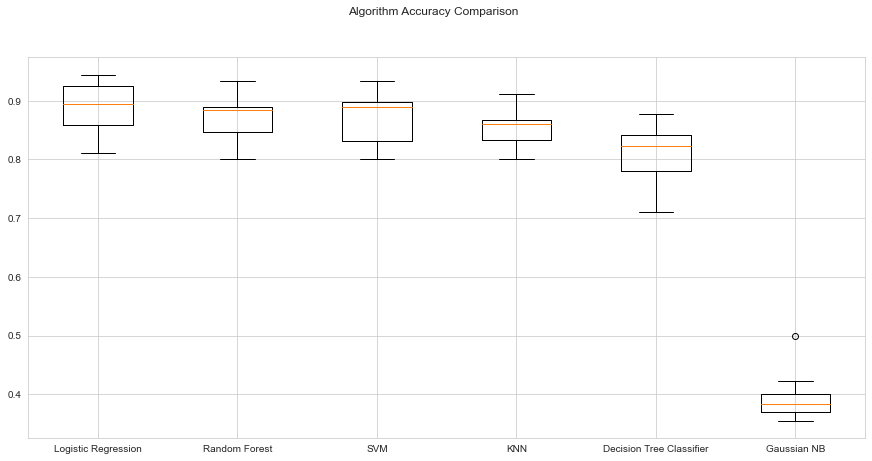

In [55]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm Accuracy Comparison')
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.show()

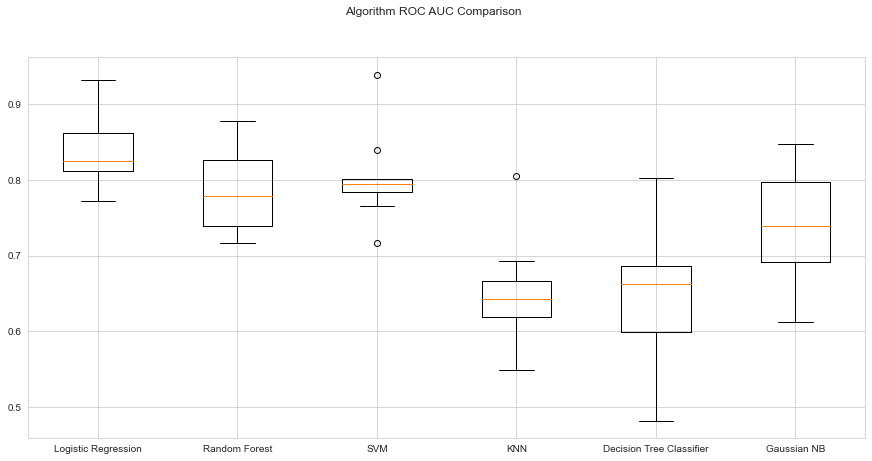

In [56]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm ROC AUC Comparison')
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)
plt.show()

Based on our ROC AUC comparison analysis, Logistic Regression and SVM show the highest mean AUC scores. We will shortlist these two algorithms for further analysis. See below for more details on these two algos.

#### SVC

In [57]:
from sklearn.svm import SVC
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = SVC(random_state=7, probability=True)
scoring = 'roc_auc'
results = model_selection.cross_val_score(
    modelCV, x_train[c], y_train, cv=kfold, scoring=scoring)
print("AUC score (STD): %.2f (%.2f)" % (results.mean(), results.std()))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


AUC score (STD): 0.81 (0.05)


In [58]:
param_grid = {'C': [0.1, 0.5, 1, 2, 5, 10, 15, 20],
              'gamma' : ['auto','scale']} # hyper-parameter list to fine-tune
random = RandomizedSearchCV(estimator=modelCV,
                            param_distributions=param_grid,
                            scoring='roc_auc',
                            verbose=1, n_jobs=-1,
                            n_iter=10000,cv=10)

random_result = random.fit(x_merged[c], y)

print('Best Score: ', random_result.best_score_)
print('Best Params: ', random_result.best_params_)
"""print('='*20)
print("best params: " + str(log_gs.best_estimator_))
print("best params: " + str(log_gs.best_params_))
print('best score:', log_gs.best_score_)
print('='*20)"""

Fitting 10 folds for each of 16 candidates, totalling 160 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 16 is smaller than n_iter=10000. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   12.6s finished


Best Score:  0.8179040616246498
Best Params:  {'gamma': 'scale', 'C': 0.1}


'print(\'=\'*20)\nprint("best params: " + str(log_gs.best_estimator_))\nprint("best params: " + str(log_gs.best_params_))\nprint(\'best score:\', log_gs.best_score_)\nprint(\'=\'*20)'

In [59]:
x_train,x_tes,y_train,y_tes = train_test_split(x_merged,y,test_size=0.1)
print(x_train.shape,x_tes.shape)

(900, 46) (100, 46)


In [60]:
from sklearn.svm import SVC
SVC = SVC(C=0.5,gamma='scale',kernel='rbf',probability=True)
SVC.fit(x_merged[c],y)

SVC(C=0.5, probability=True)

In [61]:
from sklearn import metrics
y_pred_train = SVC.predict(x_merged[c])
print(metrics.confusion_matrix(y,y_pred_train))
print(metrics.roc_auc_score(y,SVC.predict_proba(x_merged[c])[:,1]))

[[843   0]
 [141  16]]
0.9519044057090615


In [67]:
#logistic regression

In [63]:
from sklearn.linear_model import LogisticRegression
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression(solver='liblinear',
                             class_weight="balanced", 
                             random_state=7)
scoring = 'roc_auc'
results = model_selection.cross_val_score(
    modelCV, x_train[c], y_train, cv=kfold, scoring=scoring)
print("AUC score (STD): %.2f (%.2f)" % (results.mean(), results.std()))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


AUC score (STD): 0.85 (0.05)


In [64]:
param_grid = {'C': np.arange(1e-03, 2, 0.01),
              'solver': ['lbfgs', 'liblinear']} # hyper-parameter list to fine-tune
random = GridSearchCV(estimator=modelCV,
                            param_grid=param_grid,
                            scoring='roc_auc',
                            verbose=1, n_jobs=-1,
                            cv=10)

random_result = random.fit(x_merged[c], y)

print('Best Score: ', random_result.best_score_)
print('Best Params: ', random_result.best_params_)

Fitting 10 folds for each of 400 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 3200 tasks      | elapsed:   32.1s


Best Score:  0.8445215336134453
Best Params:  {'C': 0.040999999999999995, 'solver': 'lbfgs'}


[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed:   40.5s finished


In [65]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C = 0.05099999999999999 ,solver='lbfgs',class_weight=None,max_iter=1000)
LR.fit(x_train[c],y_train)

LogisticRegression(C=0.05099999999999999, max_iter=1000)

In [66]:
from sklearn import metrics
y_pred_train = LR.predict_proba(x_merged[c])
print(metrics.roc_auc_score(y,y_pred_train[:,1]))
print(metrics.confusion_matrix(y,LR.predict(x_merged[c])))

0.8767444144736345
[[827  16]
 [ 97  60]]
